In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
sns.set_style('darkgrid')

In [2]:
df_glob = pd.read_csv('ANLSYS2/density/DENS_ACT_global.csv',index_col = 0)
df_ind = pd.read_csv('ANLSYS2/density/DENS_ACT_ind.csv',index_col = 0)

df_glob['global_order']= df_glob.sum_order / (df_glob.density * 217)
df_glob['local_order'] = df_glob.lcl_order/ (df_glob.density * 217)

df_glob2 = pd.read_csv('ANLSYS2/density/DENS_PRFDR_global.csv',index_col = 0)
df_ind2 = pd.read_csv('ANLSYS2/density/DENS_PRFDR_ind.csv',index_col = 0)

df_glob2['global_order']= df_glob2.sum_order / (df_glob2.density * 217)
df_glob2['local_order'] = df_glob2.lcl_order/ (df_glob2.density * 217)

df_ind.head()

,dens,cell_id,speed,persist
0,0.1,0,5.258772,4.670415
1,0.1,1,5.326439,4.323778
2,0.1,2,5.302018,4.382420
3,0.1,3,5.282590,4.798085
4,0.1,4,5.283735,5.171741


In [3]:
df_ind.count()

dens       1196
cell_id    1196
speed      1196
persist    1196
dtype: int64

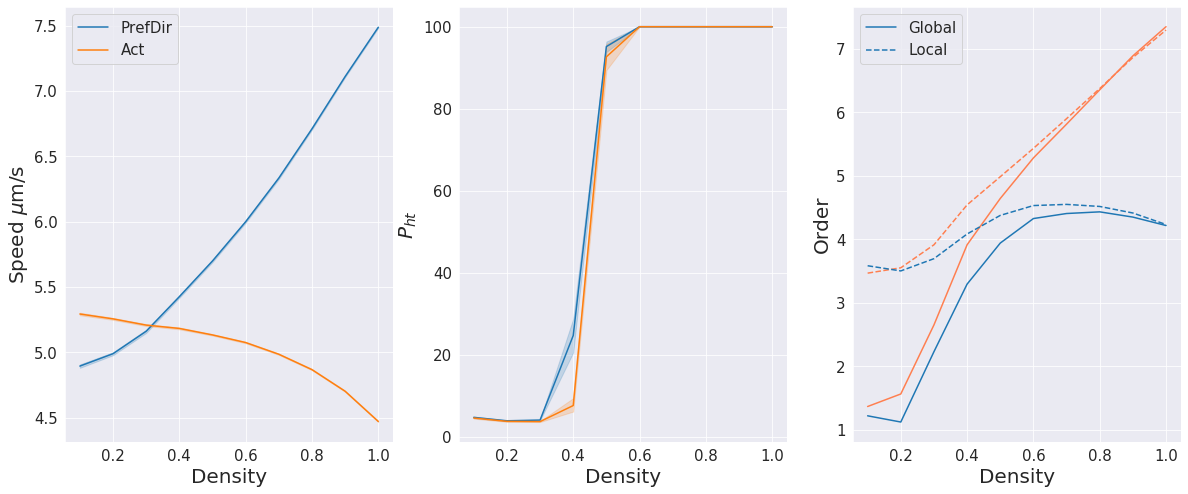

In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

current_palette = sns.color_palette()

f, (ax1, ax2,ax3) = plt.subplots(1,3,figsize = (20,8))
sns.lineplot(x = 'dens',y = 'speed',data = df_ind2,ax = ax1,label = 'PrefDir')
sns.lineplot(x = 'dens',y = 'persist',data = df_ind2,ax = ax2)
sns.lineplot(x = 'density',y = 'global_order',data = df_glob2,ax = ax3,color = 'coral')
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob2,ax = ax3,color = 'coral')


sns.lineplot(x = 'dens',y = 'speed',data = df_ind,ax = ax1,label = 'Act')
sns.lineplot(x = 'dens',y = 'persist',data = df_ind,ax = ax2)
sns.lineplot(x = 'density',y = 'global_order',data = df_glob,ax = ax3,color = current_palette[0],label = 'Global')
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax3,color = current_palette[0],label = 'Local')

ax3.lines[1].set_linestyle('--')
ax3.lines[3].set_linestyle('--')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Density',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Density',fontsize = 20)

ax3.set_ylabel('Order',fontsize = 20)
ax3.set_xlabel('Density',fontsize = 20)

ax1.legend(fontsize = 15)
ax3.legend(fontsize = 15)


In [27]:
df_ind2['density'] = df_ind2.dens
mrgd = pd.merge(df_ind2,df_glob2,on = 'density')
mrgd.head()

,dens,cell_id,speed,persist,density,pooled_persist,global_order,sum_order,std_sum_order,lcl_order,std_lcl,local_order
0,0.1,0,4.946474,5.415395,0.1,4.671551,1.370116,29.731515,11.947164,3.468526,1.160606,0.15984
1,0.1,1,4.894539,4.708348,0.1,4.671551,1.370116,29.731515,11.947164,3.468526,1.160606,0.15984
2,0.1,2,4.859545,5.322831,0.1,4.671551,1.370116,29.731515,11.947164,3.468526,1.160606,0.15984
3,0.1,3,4.832384,4.615620,0.1,4.671551,1.370116,29.731515,11.947164,3.468526,1.160606,0.15984
4,0.1,4,4.877680,4.067095,0.1,4.671551,1.370116,29.731515,11.947164,3.468526,1.160606,0.15984


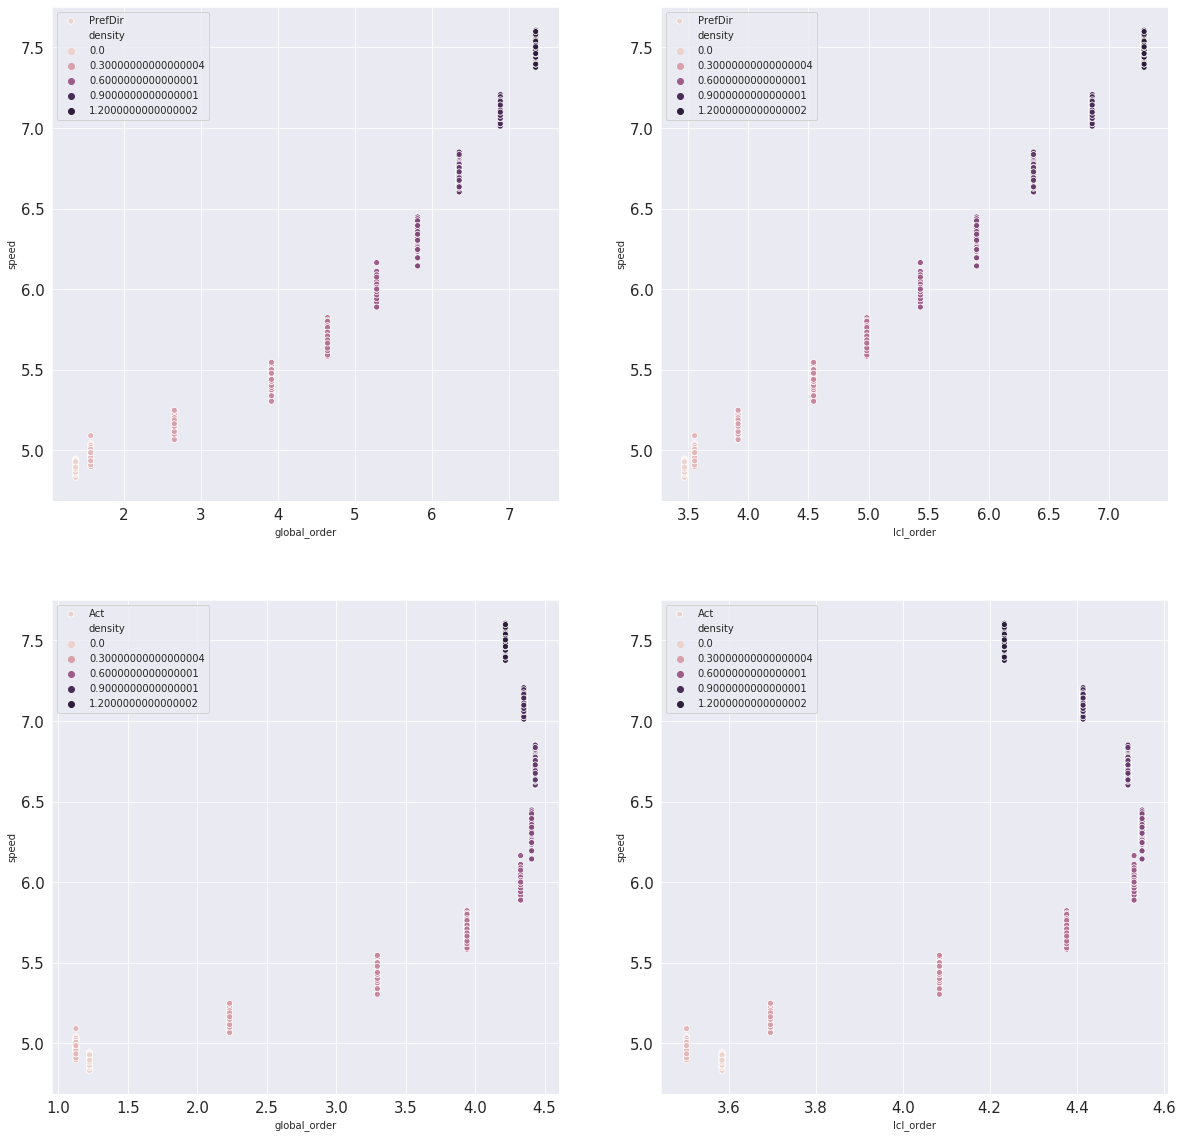

In [33]:
 # merge dfs to plot speed vs denisty
df_ind2['density'] = df_ind2.dens
mrgd = pd.merge(df_ind2,df_glob2,on = 'density')

df_ind['density'] = df_ind.dens
mrgd2 = pd.merge(df_ind2,df_glob,on = 'density')

# mrgd2 = mrgd2[mrgd2.density == .8]
# mrgd = mrgd[mrgd.density == .8]

f, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (20,20))
sns.scatterplot(x = 'global_order',y = 'speed',data = mrgd,hue = 'density',ax = ax1, units = 'cell_id',label = 'PrefDir')
sns.scatterplot(x = 'lcl_order',y = 'speed',data = mrgd,hue = 'density',ax = ax2, units = 'cell_id',label = 'PrefDir')

sns.scatterplot(x = 'global_order',y = 'speed',data = mrgd2,hue = 'density',ax = ax3, units = 'cell_id',label = 'Act')
sns.scatterplot(x = 'lcl_order',y = 'speed',data = mrgd2,hue = 'density',ax = ax4, units = 'cell_id',label = 'Act')

ax1.set_ylabel('Speed $\mu$m/s',fontsize = 20)
ax1.set_xlabel('Density',fontsize = 20)

ax2.set_ylabel('$P_{ht}$',fontsize = 20)
ax2.set_xlabel('Density',fontsize = 20)

ax3.set_ylabel('Order',fontsize = 20)
ax3.set_xlabel('Density',fontsize = 20)

ax1.legend(fontsize = 15)
ax3.legend(fontsize = 15)

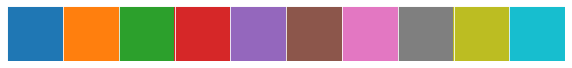

In [19]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

In [10]:
df_glob.head()
df_glob['norm_order']= df_glob.sum_order / (df_glob.density * 217)
df_glob['norm_lcl'] = df_glob.lcl_order/ (df_glob.density * 217)

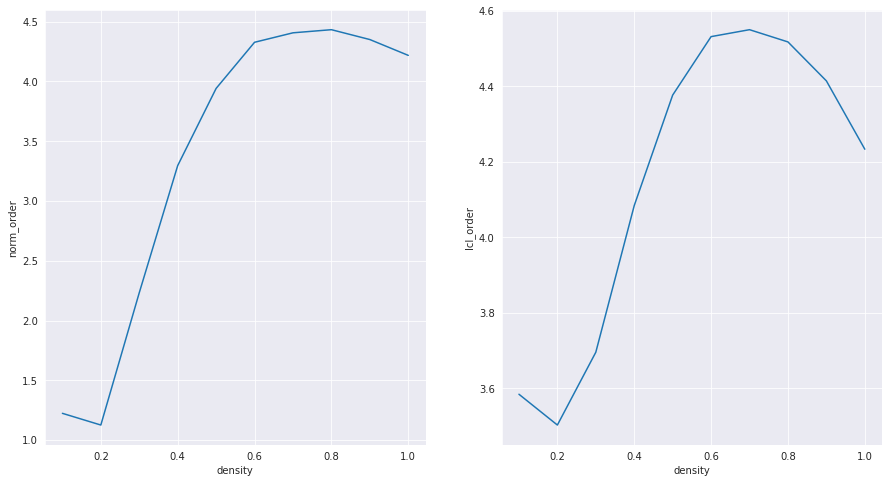

In [11]:
f, (ax1, ax2) = plt.subplots(1,2,figsize = (15,8))
sns.lineplot(x = 'density',y = 'norm_order',data = df_glob,ax = ax1)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'sum_order',data = df_glob,ax = ax2)#,size = 'std_sum_order'
#sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)
#sns.lineplot(x = 'density',y = 'norm_lcl',data = df_glob,ax = ax2)#,size = 'std_lcl'
sns.lineplot(x = 'density',y = 'lcl_order',data = df_glob,ax = ax2)#,size = 'std_lcl'

In [17]:
df_glob.density.unique()

array([0.1, 0.5, 0.6, 0.4, 0.2, 1. , 0.3, 0.7, 0.9, 0.8])

In [19]:
df_glob.count()

density          10
global_order     10
sum_order        10
std_sum_order    10
lcl_order        10
std_lcl          10
dtype: int64